# Activity: Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [29]:
# Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [2]:
# Ingest data
aqi = pd.read_csv('c4_epa_air_quality.csv', index_col=0)

## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [3]:
# Explore your DataFrame `aqi`.
aqi.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [4]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 259
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_local        260 non-null    object 
 1   state_name        260 non-null    object 
 2   county_name       260 non-null    object 
 3   city_name         260 non-null    object 
 4   local_site_name   257 non-null    object 
 5   parameter_name    260 non-null    object 
 6   units_of_measure  260 non-null    object 
 7   arithmetic_mean   260 non-null    float64
 8   aqi               260 non-null    int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 20.3+ KB


In [5]:
aqi.describe(include='all')

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260,260,260,260,257,260,260,260.000000,260.000000
unique,1,52,149,190,253,1,1,NaN,NaN
top,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,260,66,14,21,2,260,260,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


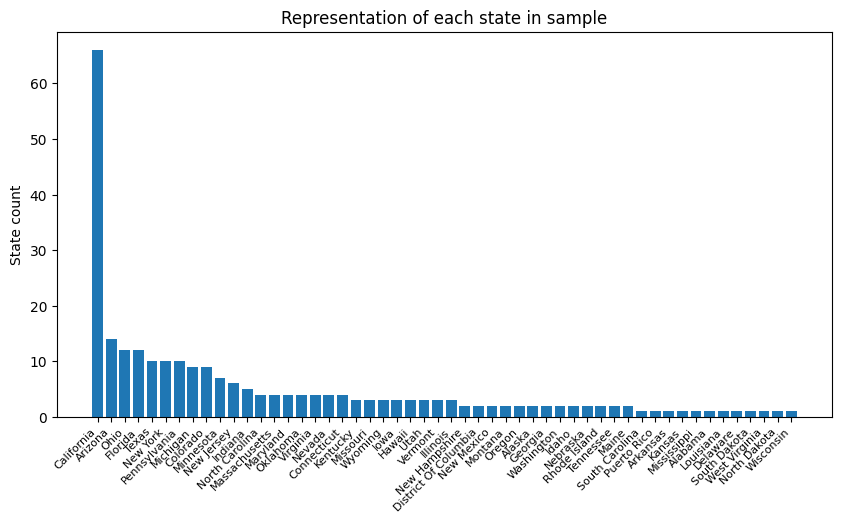

In [39]:
state_counts= aqi['state_name'].value_counts().reset_index()
plt.figure(figsize=(10,5))
plt.bar(state_counts['state_name'], state_counts['count'])
plt.title('Representation of each state in sample')
plt.ylabel('State count')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

**Question:** What time range does this data cover?

* The sample blongs to data colelcted on a single day, 2018-01-01


**Question:** What are the minimum and maximum AQI values observed in the dataset?

* Min(aqi) = 0.0
* Max(aqi) = 50.0

**Question:** Are all states equally represented in the dataset?

* No, California sites are overrepresented in the dataset.

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates (California, Florida, Michigan, Ohio, Pennsylvania, and Texas).

In [71]:
# Summarize the mean AQI for RRE states.
# Create a list of RRE states.
rre_states = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania']

# Subset `aqi` to only consider these states.
rre_aqi = aqi[aqi['state_name'].isin(rre_states)]

# Find the mean aqi for each of the RRE states.
rre_aqi_g = rre_aqi.groupby('state_name').agg(mean_aqi = pd.NamedAgg(column='aqi', aggfunc='mean'), state_count = pd.NamedAgg(column='state_name', aggfunc='count')).reset_index()
rre_aqi_g


,state_name,mean_aqi,state_count
0,California,12.121212,66
1,Florida,5.500000,12
2,Michigan,8.111111,9
3,Ohio,3.333333,12
4,Pennsylvania,2.900000,10


### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

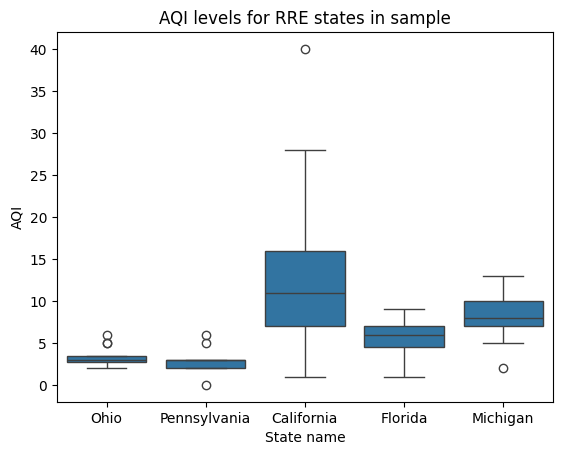

In [72]:
# Import seaborn as sns.
import seaborn as sns

# Create inline visualisation of distribution.
sns.boxplot(data=rre_aqi,
            x='state_name',
            y='aqi')
plt.title('AQI levels for RRE states in sample')
plt.xlabel('State name')
plt.ylabel('AQI')
plt.show()

**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

* Based on the mean data, it appears that California's average AQI is above the threshold of 10 required for subsidy for renewable energy. However, this would have to be verified, as there appears to be one subsbstantial outlier in the dataset. Whether this is a true datapoint or an error would have to be determined.
* Based on the distribution of the data, it is possible that the state of Michigan will also be affected by the policy, as the sample's mean is close to the threshold value. 

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for your state.

In [57]:
# Find the mean aqi for your state.
california_s_mean = rre_aqi[rre_aqi['state_name'] == 'California']['aqi'].mean()
california_s_mean

12.121212121212121

### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [58]:
# Input your confidence level here:
CI = 0.95

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [76]:
# Calculate your margin of error.

# Begin by identifying the z associated with your chosen confidence level.
z95 = 1.96

# Next, calculate your standard error.
std_error = rre_aqi[rre_aqi['state_name'] == 'California']['aqi'].std()/np.sqrt(rre_aqi[rre_aqi['state_name'] == 'California']['aqi'].count())

# Lastly, use the preceding result to calculate your margin of error.
margin_error = z95 * std_error
print(f"std error: {std_error:.2f}")
print(f"margin of error: {margin_error:.2f}")

std error: 0.90
margin of error: 1.76


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [65]:
# Calculate your confidence interval (upper and lower limits).
upper_limit = california_s_mean + margin_error
lower_limit = california_s_mean - margin_error
print(f"{lower_limit:.2f}, {upper_limit:.2f}")

10.36, 13.88


### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [66]:
# Import stats from scipy.
from scipy import stats

## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [70]:
# calculate confidence interval
cal_mean_interval = stats.norm.interval(confidence=0.95, loc=california_s_mean, scale=std_error)
cal_mean_interval


(10.359751399400034, 13.882672843024208)

# Considerations

**What are some key takeaways that you learned from this lab?**

* How to calculate confidence intervals using z-score standardised distribution
* California and Michigan are both most likely to experience an AQI >10. This means they are the most likely to be afected by the policy change.
* 

**What findings would you share with others?**

* Highlight the distribution of data from this sample using tables and boxplots constructed above. 
* California mean AQI = 12.12, 95% CI[10.36, 13.88]. This means that there is a 95% confidence that the California population AQI is between those two values and therefore above the AQI threshold for the environmental policy.
* Show methodology used for generating confidence intervals. 

**What would you convey to external stakeholders?**
* Share caveats of the sample - they only span one day and not all states are equally represented.
* Share the states with the higest mean AQI - California and Michigan - focus on those states. 
* Explain the 95% CI for California's AQI and enquire whether a higher confidence is required.
* Suggest further analysis of Michigan 


**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 